In [37]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
data_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/'
plot_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/plots/'

In [54]:
# file_names =[ 'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse']
             #'kmer_BatchCorrected_bmi_corrected_pearson_and_mse']

    #'otu_BatchCorrected_bmi_corrected_pearson_and_mse'
#'kmer_kmer_table_bmi_corrected_pearson_and_mse',

#['bmi_corrected_pearson_and_mse','bmi_corrected_pearson_and_mse']
# folder_names = ['AGP_Hfilter_otu','AGP_Hfilter_k6/robust_k','AGP_Hfilter_k7/robust_k']
# file_names =[ 'otu_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc']
# nice_names = ["OTU","KMER","KMER"]
folder_names = ['AGP_Hfilter_k7','AGP_Hfilter_k7','AGP_Hfilter_k7','AGP_Hfilter_k7','AGP_Hfilter_k7','AGP_Hfilter_k7']

file_names = ['refactor_clr_first10filter_FALSE',
              'minervafilter_FALSE','clr_pca_regress_out_scale_first10filter_FALSE',
                'refactor_first10filter_FALSE',
                'smartsva_clr_first10filter_FALSE',
                'smartsva_first10filter_FALSE']
nice_names = ["7-mer","7-mer","7-mer","7-mer","7-mer","7-mer"] 

# file_names =[ 'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#             'kmer_BatchCorrected_antibiotic_classification_auc']
#folder_names = ['AGP_Hfilter_k5/robust_k','AGP_Hfilter_k6/robust_k','AGP_Hfilter_k7/robust_k','AGP_Hfilter_k8/robust_k']

#folder_names = ['AGP_otumatch_otu','AGP_otumatch_k7','AGP_otumatch_k7'] #,'AGP_otumatch_k7']#['AGP_healthymax_k6', 'AGP_healthymax_k7']
#['AGP_otumatch_otu','AGP_otumatch_k7','AGP_otumatch_k7']
#['AGP_healthymax_k6', 'AGP_healthymax_k7']
#nice_names = ["5-mer","6-mer","7-mer","8-mer"] #,"KMER"]#, 'KMER old batch correct','KMER MINERVA']

metric_word = 'pearson' # 'auc_all'#''auc_all' #
classifier = 'bmi_prediction'#'  #'Naive Bayes' #'
select_columns_bool = True
title = 'Pearson correlation of predicted body mass index (BMI)' #AUC for prediction of antibiotic history' #
special_name = "BMI prediction"# "Antibody prediction"# 

In [56]:
df_metric = pd.DataFrame()

In [57]:

for f in range(len(file_names)):

    data_temp = pickle.load( open( data_folder + folder_names[f] +"/kmer_BatchCorrected_bmi_corrected_"+ file_names[f] + "_pearson_and_mse.pkl" ,"rb"))
    #methods_lists.append([k for k in data1.keys()])   
    if metric_word == "auc_all":
        df_metric[nice_names[f] + file_names[f]] = pd.Series(data_temp[classifier][metric_word])
    else:
        df_metric[nice_names[f] + file_names[f]] = pd.Series(data_temp[metric_word])
    

In [50]:
df_metric

,7-merrefactor_clr_first10filter_FALSE,7-merminervafilter_FALSE,7-merrefactor_first10filter_FALSE,7-mersmartsva_clr_first10filter_FALSE,7-mersmartsva_first10filter_FALSE,7-merclr_pca_regress_out_scale_first10filter_FALSE
0,0.103561,0.030517,0.145026,-0.110312,0.010231,0.099022
1,0.063187,0.029677,0.053572,-0.153312,0.123737,0.029657
2,0.048015,-0.023519,-0.006286,-0.051103,-0.031341,0.077762
3,0.137831,0.097755,0.023554,-0.105823,0.006275,0.083421
4,0.097243,0.049810,0.015892,-0.121049,0.020848,0.065861
5,0.100452,-0.029343,0.073743,-0.108277,-0.034445,0.070580
6,0.062782,-0.003827,0.001501,-0.088074,0.017710,0.091224
7,0.126871,0.101782,0.026487,-0.166619,-0.023694,0.063192
8,0.164121,0.079192,0.062279,-0.099061,0.031422,0.058502
9,0.127906,0.072487,0.047446,-0.070524,0.060724,0.157156


In [59]:
df_metric.columns
#df_metric.sort_values('OTUraw')
#In this example, there are NO 

Index(['7-merrefactor_clr_first10filter_FALSE', '7-merminervafilter_FALSE',
       '7-merclr_pca_regress_out_scale_first10filter_FALSE',
       '7-merrefactor_first10filter_FALSE',
       '7-mersmartsva_clr_first10filter_FALSE',
       '7-mersmartsva_first10filter_FALSE'],
      dtype='object')

In [63]:
select_columns_bool =True

In [64]:
select_columns = df_metric.columns #[ i + 'clr_pca_regress_out_no_scale_first10' for i in nice_names ] 
select_labels = ['Refactor CLR 220 SVs','MINERVA 10 SVs','MINERVA 220 SVs', 
                 "Refactor 120 SVs", "SmartSVA CLR 220 SVs","SmartSVA 120 SVs"]

# select_labels = ["MINERVA no std 10 SVs", "MINERVA std 10 SVs","SmartSVA 10 SVs", 
#                  "MINERVA no std 5 SVs", "MINERVA std 5 SVs","SmartSVA 5 SVs"]






#[ i + ' MINERVA' for i in nice_names ] 

In [24]:
select_labels

['MINERVA no std 10 SVs',
 'MINERVA std 10 SVs',
 'SmartSVA 10 SVs',
 'MINERVA no std 5 SVs',
 'MINERVA std 5 SVs',
 'SmartSVA 5 SVs']

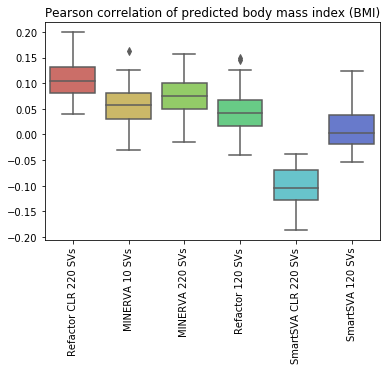

In [65]:
# ['6-mers norm', '6-mers no_scale_clr','6-mers scale_clr','7-mers norm','7-mers no_scale_clr','7-mers scale_clr']
# ['6-mers Raw', '6-mers MINVERVA','6-mers MINERVA-scale', '7-mers Raw','7-mers MINVERVA','7-mers MINVERVA-scale']
# Make boxplot for one group only

current_palette = sns.color_palette()
#sns.palplot(current_palette)
palette = sns.color_palette("hls", 8)
plot_color = palette.as_hex()


# select_columns = ['7-merclr_pca_regress_out_no_scale_first10filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first10filter_FALSE',
#        '7-mersmartsva_first10filter_FALSE',
#        '7-merclr_pca_regress_out_no_scale_first5filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first5filter_FALSE',
#        '7-mersmartsva_first5filter_FALSE']

# select_labels = ["KMER MINERVA "]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma','KMERraw',
#                   'KMERbmc','KMERComBat','KMERlimma',"KMERsmartsva_first10",
#                   "KMERrefactor_first10", "KMERclr_pca_regress_out_no_scale_first10"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"] #clr_pca_regress_out_no_scale_first10

# ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'OTUclr_pca_regress_out_no_scale',"KMERnorm","KMERno_scale_clr"]

# select_labels = ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer BMC", "K-mer ComBat",
#                 "K-mer limma","K-mer smartsva","K-mer refactor","K-mer MINERVA"]
#['OTU raw','OTU BMC','OTU ComBat','OTU limma',"OTU MINERVA","K-mer raw", "K-mer MINERVA"]


# ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer ComBat","K-mer smartsva*",
#                                     "K-mer MINERVA"]
if select_columns_bool:
    g=sns.boxplot( data = df_metric[select_columns],palette=plot_color)
    #plot_color[0:4] + [plot_color[7]] + [plot_color[4]] + [plot_color[7]
    g.set_xticklabels(rotation=90,labels = select_labels) #df_metric.columns
else:
    g=sns.boxplot( data = df_metric)
    g.set_xticklabels(rotation=90,labels = df_metric.columns)
    
g.set_title(title)
plt.savefig(plot_folder + 'boxplots_' + classifier + '_' + metric_word + "_" + special_name + '.pdf',bbox_inches='tight')
plt.savefig(plot_folder + 'boxplots_' + classifier + '_' + metric_word + "_" + special_name + '.png',bbox_inches='tight')

In [23]:
plot_folder

'/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/plots/'

[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]